In [3]:
import numpy as np

from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

import pymanopt

import scipy.io as io

from sklearn.decomposition import PCA

from scipy.spatial.distance import hamming

import sys
sys.path.append('../')
from scripts import flag_dimensionality_reduction as fdr

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

import os

In [4]:

base_path = 'AD_CampsValls/'
f_name = 'TexasCoast.mat'

print('-------------------------------------')

print('-------------------------------------')

print('-------------------------------------')

print('-------------------------------------')

data = io.loadmat(os.path.join(base_path, f_name))

X = data["Y"]
labels = data['labels'].flatten()

#mean center data
column_means = np.mean(X, axis=0)
Xcenter = X - column_means



-------------------------------------
-------------------------------------
-------------------------------------
-------------------------------------


EVR: 0.996


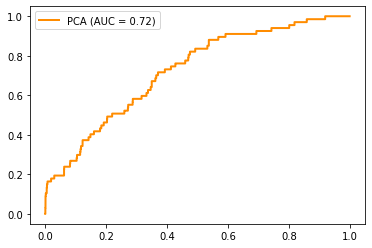

In [6]:
pca = PCA(n_components = 5)
pca.fit(X)
print(f'EVR: {np.round(np.sum(pca.explained_variance_ratio_),4)}')
Wpca = pca.components_

pca_errs = []
for i in range(len(X)):
    x = Xcenter[[i],:]
    pca_errs.append(np.linalg.norm(x @ Wpca.T @ Wpca - x)**2)
pca_preds = np.array(pca_errs)
pca_preds = pca_preds/np.max(pca_preds)


# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(labels, pca_preds)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'PCA (AUC = {roc_auc:.2f})')
plt.legend()


In [15]:
Wpca.shape

(5, 204)

In [16]:
fl_type = [1,2,3,4,5]

Wfpca, errs, cauchs = fdr.flag_robust_pca(Xcenter.T, fl_type, 'rpca', verbose = True, return_all = True, max_iters = 200, init = 'rand')


--------------------
iteration 0
objective 60865481.671701044
flag distance between B0 and B1 2.2034946841714693

--------------------
iteration 1
objective 61589630.09294432
flag distance between B0 and B1 0.9437480158343136

--------------------
iteration 2
objective 61848529.26839362
flag distance between B0 and B1 0.6145150236174179

--------------------
iteration 3
objective 61948076.83256607
flag distance between B0 and B1 0.4283375479857628

--------------------
iteration 4
objective 61981607.18678203
flag distance between B0 and B1 0.20151700654567048

--------------------
iteration 5
objective 61995425.78075864
flag distance between B0 and B1 0.10734102860462354

--------------------
iteration 6
objective 62004362.4357072
flag distance between B0 and B1 0.09196024122246008

--------------------
iteration 7
objective 62009569.0441256
flag distance between B0 and B1 0.07294768566180342

--------------------
iteration 8
objective 62013015.695708856
flag distance between B0 and B1

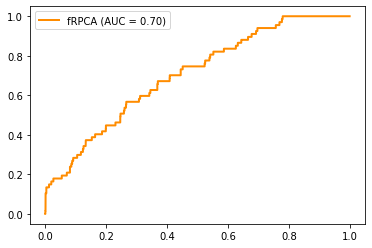

In [18]:
fpca_errs = []
for i in range(len(X)):   
    x = Xcenter[[i],:]
    fpca_errs.append(np.linalg.norm(x @ Wfpca @ Wfpca.T - x))
    
fpca_preds = np.array(fpca_errs)
fpca_preds = fpca_preds/np.max(fpca_preds)

# Compute ROC curve and AUC
ffpr, ftpr, thresholds = roc_curve(labels, fpca_preds)
froc_auc = auc(ffpr, ftpr)

plt.figure()
plt.plot(ffpr, ftpr, color='darkorange', lw=2, label=f'fRPCA (AUC = {froc_auc:.2f})')
plt.legend()

# # Plot ROC curve
# plt.plot(fpr, tpr, color='darkgreen', lw=2, label=f'Flagified-PCA (AUC = {roc_auc:.2f})')
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc="lower right")
# plt.show()


--------------------
iteration 0
objective 41301838.169094846
flag distance between B0 and B1 1.7182861701514531

--------------------
iteration 1
objective 40610888.280081734
flag distance between B0 and B1 0.20857605095945356

--------------------
iteration 2
objective 40129987.638987206
flag distance between B0 and B1 0.14906882521666454

--------------------
iteration 3
objective 39807340.47083746
flag distance between B0 and B1 0.11761050029352865

--------------------
iteration 4
objective 39652324.34203991
flag distance between B0 and B1 0.07946504816554525

--------------------
iteration 5
objective 39581430.60996532
flag distance between B0 and B1 0.0510496306080962

--------------------
iteration 6
objective 39545296.58877918
flag distance between B0 and B1 0.033563837095802684

--------------------
iteration 7
objective 39524657.31665452
flag distance between B0 and B1 0.023446950262798912

--------------------
iteration 8
objective 39511932.92867081
flag distance between B0

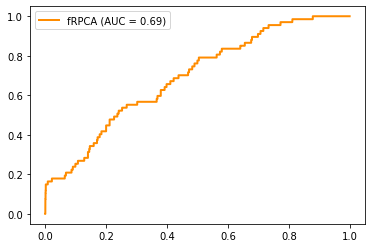

In [21]:
fl_type = [2,3]

Wfpca, errs, cauchs = fdr.flag_robust_pca(Xcenter.T, fl_type, 'wpca', verbose = True, return_all = True, max_iters = 200, init = 'rand')

fpca_errs = []
for i in range(len(X)):   
    x = Xcenter[[i],:]
    fpca_errs.append(np.linalg.norm(x @ Wfpca @ Wfpca.T - x))
    
fpca_preds = np.array(fpca_errs)
fpca_preds = fpca_preds/np.max(fpca_preds)

# Compute ROC curve and AUC
ffpr, ftpr, thresholds = roc_curve(labels, fpca_preds)
froc_auc = auc(ffpr, ftpr)

plt.figure()
plt.plot(ffpr, ftpr, color='darkorange', lw=2, label=f'fRPCA (AUC = {froc_auc:.2f})')
plt.legend()

# # Plot ROC curve
# plt.plot(fpr, tpr, color='darkgreen', lw=2, label=f'Flagified-PCA (AUC = {roc_auc:.2f})')
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc="lower right")
# plt.show()


--------------------
iteration 0
objective 40218.24841623433
flag distance between B0 and B1 0.7856934992613577

--------------------
iteration 1
objective 40218.24841623433
flag distance between B0 and B1 0.0



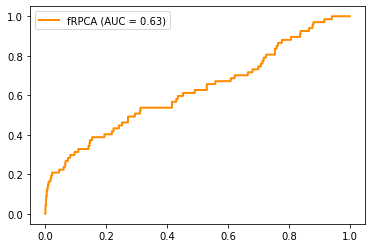

In [22]:
fl_type = [3]

Wfpca, errs, cauchs = fdr.flag_robust_pca(Xcenter.T, fl_type, 'dpcp', verbose = True, return_all = True, max_iters = 200, init = 'rand')

fpca_errs = []
for i in range(len(X)):   
    x = Xcenter[[i],:]
    fpca_errs.append(np.linalg.norm(x @ Wfpca @ Wfpca.T))
    
fpca_preds = np.array(fpca_errs)
fpca_preds = fpca_preds/np.max(fpca_preds)

# Compute ROC curve and AUC
ffpr, ftpr, thresholds = roc_curve(labels, fpca_preds)
froc_auc = auc(ffpr, ftpr)

plt.figure()
plt.plot(ffpr, ftpr, color='darkorange', lw=2, label=f'fRPCA (AUC = {froc_auc:.2f})')
plt.legend()

# # Plot ROC curve
# plt.plot(fpr, tpr, color='darkgreen', lw=2, label=f'Flagified-PCA (AUC = {roc_auc:.2f})')
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc="lower right")
# plt.show()


In [14]:
x.shape

(1, 204)

# Anomaly Detection

## 5 PCs

-------------------------------------
-------------------------------------
-------------------------------------
-------------------------------------
EVR: 0.996
--------------------
iteration 0
objective 45427131.92925253
flag distance between B0 and B1 0.539580139919836

--------------------
iteration 1
objective 50398456.123872094
flag distance between B0 and B1 0.8707465252486642

--------------------
iteration 2
objective 60389682.12825207
flag distance between B0 and B1 0.4428593306168039

--------------------
iteration 3
objective 61491340.93541906
flag distance between B0 and B1 0.24752858570216246

--------------------
iteration 4
objective 61695640.24631971
flag distance between B0 and B1 0.169298049460548

--------------------
iteration 5
objective 61785917.37624543
flag distance between B0 and B1 0.14460466089502091

--------------------
iteration 6
objective 61848912.994602725
flag distance between B0 and B1 0.12859134841344735

--------------------
iteration 7
objective 

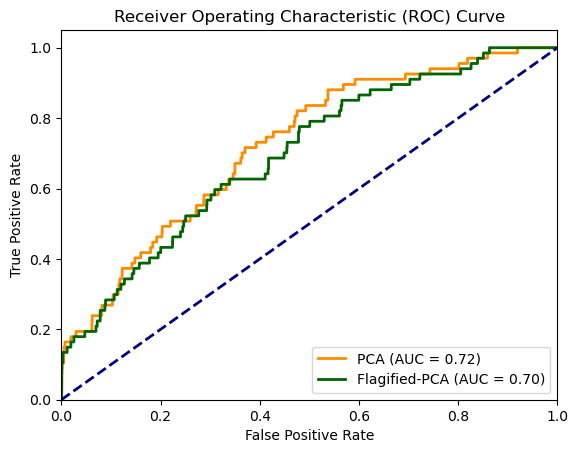

In [5]:





fl_type = [1,2,3,4,5]

Wfpca = fdr.nate_flag_pca(Xcenter.T, fl_type, verbose = True, return_all = False, max_iters = 50, init = 'svd')
# flag_pca_err = fdr.chordal_dist(Xcenter.T, flag_pca, flag_type = fl_type)

# fpca_errs = []
# for i in range(len(X)):   
#     x = Xcenter[[i],:]
#     fpca_err = 0
#     for j in range(len(fl_type)):
#         if j == 0:
#             ft0 = 0
#         else:
#             ft0 = fl_type[j-1]
#         ft1 = fl_type[j]
#         fpca_err += np.linalg.norm(x.T - Wfpca[:,ft0:ft1] @ Wfpca[:,ft0:ft1].T@ x.T)**2
#     fpca_errs.append(fpca_err)

fpca_errs = []
for i in range(len(X)):   
    x = Xcenter[[i],:]
    fpca_errs.append(np.linalg.norm(x @ Wfpca @ Wfpca.T - x))
    
fpca_preds = np.array(fpca_errs)
fpca_preds = fpca_preds/np.max(fpca_preds)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(labels, fpca_preds)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='darkgreen', lw=2, label=f'Flagified-PCA (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


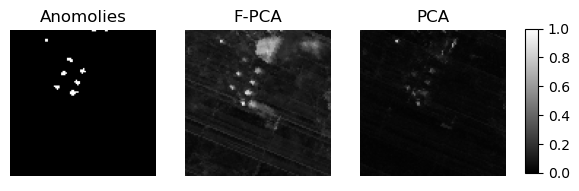

In [14]:

labels_im = data['labels']
im_shape = labels_im.shape
pca_errs_im  = np.reshape(pca_preds, newshape = im_shape).T
fpca_errs_im  = np.reshape(fpca_preds, newshape = im_shape).T


ims = [labels_im, fpca_errs_im, pca_errs_im]
titles = ['Anomalies', f'F-PCA', f'PCA']

# Create a figure with subplots
fig, axs = plt.subplots(1,3)

# Loop through the images and add them to subplots
implts = []
for i, im, title in zip(range(len(ims)), ims, titles):
    
    # Display the grayscale image with imshow
    implts.append( axs[i].imshow(im, cmap='gray'))
    axs[i].set_title(title)
    axs[i].axis('off')


norm = plt.Normalize(vmin=np.min([ims[0], ims[1], ims[2]]), vmax=np.max([ims[0], ims[1], ims[2]]))
implts[0].set_norm(norm)
implts[1].set_norm(norm)
implts[2].set_norm(norm)

cax = fig.add_axes([0.93, 0.35, 0.02, 0.3])  # [x, y, width, height]
cbar = plt.colorbar(implts[0], cax=cax)


-------------------------------------
-------------------------------------
-------------------------------------
-------------------------------------
EVR: 0.9998
--------------------
iteration 0
objective 52471770.51036688
flag distance between B0 and B1 1.1629174522682093

--------------------
iteration 1
objective 75952137.71298636
flag distance between B0 and B1 3.0872274568481473

--------------------
iteration 2
objective 135633159.0435926
flag distance between B0 and B1 3.1044706716529524

--------------------
iteration 3
objective 138541127.14909902
flag distance between B0 and B1 2.221256968520333

--------------------
iteration 4
objective 139313757.90459213
flag distance between B0 and B1 1.7394372668075637

--------------------
iteration 5
objective 139581851.96805528
flag distance between B0 and B1 1.4034552693014348

--------------------
iteration 6
objective 139691894.46211088
flag distance between B0 and B1 1.0311047574591472

--------------------
iteration 7
objective

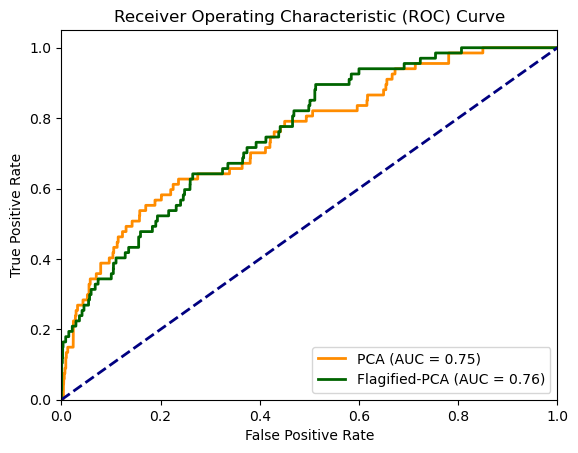

In [16]:

base_path = 'data/AD_CampsValls/'
f_name = 'TexasCoast.mat'

print('-------------------------------------')

print('-------------------------------------')

print('-------------------------------------')

print('-------------------------------------')

data = io.loadmat(os.path.join(base_path, f_name))

X = data["Y"]
labels = data['labels'].flatten()

#mean center data
column_means = np.mean(X, axis=0)
Xcenter = X - column_means

pca = PCA(n_components = 25)
pca.fit(X)
print(f'EVR: {np.round(np.sum(pca.explained_variance_ratio_),4)}')
Xpca = pca.transform(X)
Wpca = pca.components_

pca_errs = []
for i in range(len(X)):
    xpca = Xpca[[i],:]
    x = Xcenter[[i],:]
    pca_errs.append(np.linalg.norm(xpca @ Wpca - x)**2)
pca_preds = np.array(pca_errs)
pca_preds = pca_preds/np.max(pca_preds)


# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(labels, pca_preds)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'PCA (AUC = {roc_auc:.2f})')



fl_type = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]

Wfpca = fdr.nate_flag_pca(Xcenter.T, fl_type, verbose = True, return_all = False, max_iters = 50, init = 'svd')
# flag_pca_err = fdr.chordal_dist(Xcenter.T, flag_pca, flag_type = fl_type)

# fpca_errs = []
# for i in range(len(X)):   
#     x = Xcenter[[i],:]
#     fpca_err = 0
#     for j in range(len(fl_type)):
#         if j == 0:
#             ft0 = 0
#         else:
#             ft0 = fl_type[j-1]
#         ft1 = fl_type[j]
#         fpca_err += np.linalg.norm(x.T - Wfpca[:,ft0:ft1] @ Wfpca[:,ft0:ft1].T@ x.T)**2
#     fpca_errs.append(fpca_err)

fpca_errs = []
for i in range(len(X)):   
    x = Xcenter[[i],:]
    fpca_errs.append(np.linalg.norm(x @ Wfpca @ Wfpca.T - x))
    
fpca_preds = np.array(fpca_errs)
fpca_preds = fpca_preds/np.max(fpca_preds)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(labels, fpca_preds)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='darkgreen', lw=2, label=f'Flagified-PCA (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


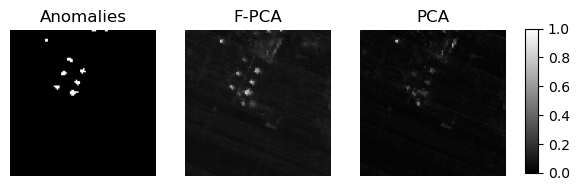

In [18]:



labels_im = data['labels']
im_shape = labels_im.shape
pca_errs_im  = np.reshape(pca_preds, newshape = im_shape).T
fpca_errs_im  = np.reshape(fpca_preds, newshape = im_shape).T


ims = [labels_im, fpca_errs_im, pca_errs_im]
titles = ['Anomalies', f'F-PCA', f'PCA']

# Create a figure with subplots
fig, axs = plt.subplots(1,3)

# Loop through the images and add them to subplots
implts = []
for i, im, title in zip(range(len(ims)), ims, titles):
    
    # Display the grayscale image with imshow
    implts.append( axs[i].imshow(im, cmap='gray'))
    axs[i].set_title(title)
    axs[i].axis('off')


norm = plt.Normalize(vmin=np.min([ims[0], ims[1], ims[2]]), vmax=np.max([ims[0], ims[1], ims[2]]))
implts[0].set_norm(norm)
implts[1].set_norm(norm)
implts[2].set_norm(norm)

cax = fig.add_axes([0.93, 0.35, 0.02, 0.3])  # [x, y, width, height]
cbar = plt.colorbar(implts[0], cax=cax)


-------------------------------------
-------------------------------------
-------------------------------------
-------------------------------------
EVR: 0.9994
--------------------
iteration 0
objective 66623395.9024057
flag distance between B0 and B1 0.8950538389744213

--------------------
iteration 1
objective 86356415.27019715
flag distance between B0 and B1 1.074461013954842

--------------------
iteration 2
objective 101586491.61620346
flag distance between B0 and B1 1.1255879045984625

--------------------
iteration 3
objective 102609637.10166778
flag distance between B0 and B1 0.5834493933973146

--------------------
iteration 4
objective 102771101.16251136
flag distance between B0 and B1 0.38373172718921655

--------------------
iteration 5
objective 102828799.16131113
flag distance between B0 and B1 0.2518005103643057

--------------------
iteration 6
objective 102854734.75853227
flag distance between B0 and B1 0.2673542809924744

--------------------
iteration 7
objectiv

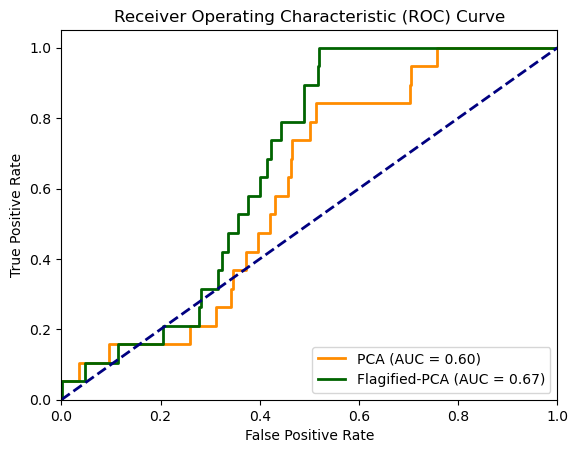

In [20]:

base_path = 'data/AD_CampsValls/'
f_name = 'COASTISLAND.mat'

print('-------------------------------------')

print('-------------------------------------')

print('-------------------------------------')

print('-------------------------------------')

data = io.loadmat(os.path.join(base_path, f_name))

X = data["Y"]
labels = data['labels'].flatten()

#mean center data
column_means = np.mean(X, axis=0)
Xcenter = X - column_means

pca = PCA(n_components = 5)
pca.fit(X)
print(f'EVR: {np.round(np.sum(pca.explained_variance_ratio_),4)}')
Xpca = pca.transform(X)
Wpca = pca.components_

pca_errs = []
for i in range(len(X)):
    xpca = Xpca[[i],:]
    x = Xcenter[[i],:]
    pca_errs.append(np.linalg.norm(xpca @ Wpca - x)**2)
pca_preds = np.array(pca_errs)
pca_preds = pca_preds/np.max(pca_preds)


# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(labels, pca_preds)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'PCA (AUC = {roc_auc:.2f})')



fl_type = [1,2,3,4,5]

Wfpca = fdr.nate_flag_pca(Xcenter.T, fl_type, verbose = True, return_all = False, max_iters = 50, init = 'svd')
# flag_pca_err = fdr.chordal_dist(Xcenter.T, flag_pca, flag_type = fl_type)

# fpca_errs = []
# for i in range(len(X)):   
#     x = Xcenter[[i],:]
#     fpca_err = 0
#     for j in range(len(fl_type)):
#         if j == 0:
#             ft0 = 0
#         else:
#             ft0 = fl_type[j-1]
#         ft1 = fl_type[j]
#         fpca_err += np.linalg.norm(x.T - Wfpca[:,ft0:ft1] @ Wfpca[:,ft0:ft1].T@ x.T)**2
#     fpca_errs.append(fpca_err)

fpca_errs = []
for i in range(len(X)):   
    x = Xcenter[[i],:]
    fpca_errs.append(np.linalg.norm(x @ Wfpca @ Wfpca.T - x))
    
fpca_preds = np.array(fpca_errs)
fpca_preds = fpca_preds/np.max(fpca_preds)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(labels, fpca_preds)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='darkgreen', lw=2, label=f'Flagified-PCA (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


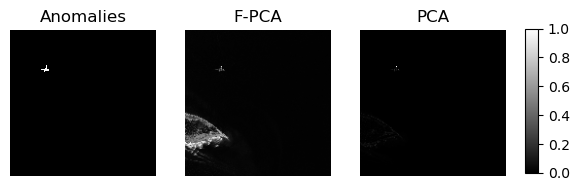

In [21]:

labels_im = data['labels']
im_shape = labels_im.shape
pca_errs_im  = np.reshape(pca_preds, newshape = im_shape).T
fpca_errs_im  = np.reshape(fpca_preds, newshape = im_shape).T


ims = [labels_im, fpca_errs_im, pca_errs_im]
titles = ['Anomalies', f'F-PCA', f'PCA']

# Create a figure with subplots
fig, axs = plt.subplots(1,3)

# Loop through the images and add them to subplots
implts = []
for i, im, title in zip(range(len(ims)), ims, titles):
    
    # Display the grayscale image with imshow
    implts.append( axs[i].imshow(im, cmap='gray'))
    axs[i].set_title(title)
    axs[i].axis('off')


norm = plt.Normalize(vmin=np.min([ims[0], ims[1], ims[2]]), vmax=np.max([ims[0], ims[1], ims[2]]))
implts[0].set_norm(norm)
implts[1].set_norm(norm)
implts[2].set_norm(norm)

cax = fig.add_axes([0.93, 0.35, 0.02, 0.3])  # [x, y, width, height]
cbar = plt.colorbar(implts[0], cax=cax)


-------------------------------------
-------------------------------------
-------------------------------------
-------------------------------------
EVR: 0.9999
--------------------
iteration 0
objective 69297292.41578345
flag distance between B0 and B1 1.2885424641222156

--------------------
iteration 1
objective 116924124.34015952
flag distance between B0 and B1 2.373917092342737

--------------------
iteration 2
objective 145611943.416549
flag distance between B0 and B1 2.1762334957441545

--------------------
iteration 3
objective 146444428.90309963
flag distance between B0 and B1 1.3657763108895975

--------------------
iteration 4
objective 146706700.74922326
flag distance between B0 and B1 0.9505885648425282

--------------------
iteration 5
objective 146827122.3218211
flag distance between B0 and B1 0.6388856533193786

--------------------
iteration 6
objective 146873036.74701658
flag distance between B0 and B1 0.6598854970549501

--------------------
iteration 7
objective 

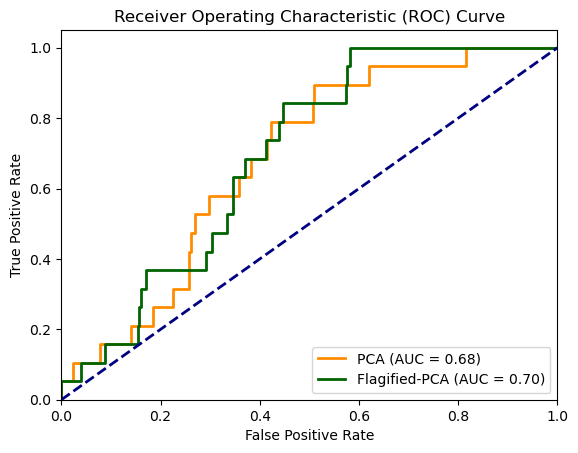

In [22]:

base_path = 'data/AD_CampsValls/'
f_name = 'COASTISLAND.mat'

print('-------------------------------------')

print('-------------------------------------')

print('-------------------------------------')

print('-------------------------------------')

data = io.loadmat(os.path.join(base_path, f_name))

X = data["Y"]
labels = data['labels'].flatten()

#mean center data
column_means = np.mean(X, axis=0)
Xcenter = X - column_means

pca = PCA(n_components = 10)
pca.fit(X)
print(f'EVR: {np.round(np.sum(pca.explained_variance_ratio_),4)}')
Xpca = pca.transform(X)
Wpca = pca.components_

pca_errs = []
for i in range(len(X)):
    xpca = Xpca[[i],:]
    x = Xcenter[[i],:]
    pca_errs.append(np.linalg.norm(xpca @ Wpca - x)**2)
pca_preds = np.array(pca_errs)
pca_preds = pca_preds/np.max(pca_preds)


# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(labels, pca_preds)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'PCA (AUC = {roc_auc:.2f})')



fl_type = [1,2,3,4,5,6,7,8,9,10]

Wfpca = fdr.nate_flag_pca(Xcenter.T, fl_type, verbose = True, return_all = False, max_iters = 50, init = 'svd')
# flag_pca_err = fdr.chordal_dist(Xcenter.T, flag_pca, flag_type = fl_type)

# fpca_errs = []
# for i in range(len(X)):   
#     x = Xcenter[[i],:]
#     fpca_err = 0
#     for j in range(len(fl_type)):
#         if j == 0:
#             ft0 = 0
#         else:
#             ft0 = fl_type[j-1]
#         ft1 = fl_type[j]
#         fpca_err += np.linalg.norm(x.T - Wfpca[:,ft0:ft1] @ Wfpca[:,ft0:ft1].T@ x.T)**2
#     fpca_errs.append(fpca_err)

fpca_errs = []
for i in range(len(X)):   
    x = Xcenter[[i],:]
    fpca_errs.append(np.linalg.norm(x @ Wfpca @ Wfpca.T - x))
    
fpca_preds = np.array(fpca_errs)
fpca_preds = fpca_preds/np.max(fpca_preds)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(labels, fpca_preds)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='darkgreen', lw=2, label=f'Flagified-PCA (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


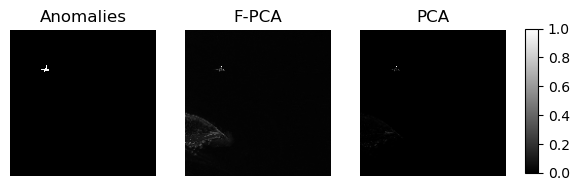

In [23]:

labels_im = data['labels']
im_shape = labels_im.shape
pca_errs_im  = np.reshape(pca_preds, newshape = im_shape).T
fpca_errs_im  = np.reshape(fpca_preds, newshape = im_shape).T


ims = [labels_im, fpca_errs_im, pca_errs_im]
titles = ['Anomalies', f'F-PCA', f'PCA']

# Create a figure with subplots
fig, axs = plt.subplots(1,3)

# Loop through the images and add them to subplots
implts = []
for i, im, title in zip(range(len(ims)), ims, titles):
    
    # Display the grayscale image with imshow
    implts.append( axs[i].imshow(im, cmap='gray'))
    axs[i].set_title(title)
    axs[i].axis('off')


norm = plt.Normalize(vmin=np.min([ims[0], ims[1], ims[2]]), vmax=np.max([ims[0], ims[1], ims[2]]))
implts[0].set_norm(norm)
implts[1].set_norm(norm)
implts[2].set_norm(norm)

cax = fig.add_axes([0.93, 0.35, 0.02, 0.3])  # [x, y, width, height]
cbar = plt.colorbar(implts[0], cax=cax)
